### Imports

In [1]:
%matplotlib inline
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

DATASET_PATH = '../data/train/'
VAL_DATASET_PATH = '../data/val/'
TEST_DATASET_PATH = '../data/test/'

### Create Keras CNN Model

In [2]:
num_classes = 6
im_h, im_w = 100, 100

In [3]:
from keras.backend import clear_session

clear_session()
model = None

Using TensorFlow backend.


In [4]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout
from keras.losses import categorical_crossentropy
from keras.optimizers import SGD, Adam, Adadelta
from keras.metrics import categorical_accuracy

model = Sequential()

model.add(Flatten(input_shape=(im_w,im_h,1)))
model.add(Dense(512, activation="relu"))
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.125))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(6, activation="softmax"))

model.compile(loss=categorical_crossentropy,
              optimizer=Adadelta(),
              metrics=[categorical_accuracy])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                16448     
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 6)                

### Create Data Iterators

In [5]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator()

In [6]:
BS = 64

train_it = datagen.flow_from_directory(DATASET_PATH, class_mode='categorical', shuffle=True, target_size=(im_h,im_w), color_mode='grayscale', batch_size=BS)
val_it = datagen.flow_from_directory(VAL_DATASET_PATH, class_mode='categorical', shuffle=True, target_size=(im_h,im_w), color_mode='grayscale', batch_size=BS)
test_it = datagen.flow_from_directory(TEST_DATASET_PATH, class_mode='categorical', shuffle=True, target_size=(im_h,im_w), color_mode='grayscale', batch_size=BS)

Found 6000 images belonging to 6 classes.
Found 900 images belonging to 6 classes.
Found 1200 images belonging to 6 classes.


### Train CNN

In [7]:
nb_train_steps = train_it.samples // train_it.batch_size
nb_val_steps = val_it.samples // val_it.batch_size

In [8]:
from keras.callbacks import EarlyStopping
EPOC = 25

es = EarlyStopping(monitor='val_loss', mode='min', patience=3, verbose=1)

In [9]:
import time
t1=time.time()
history = model.fit_generator(train_it,
                                    steps_per_epoch=nb_train_steps,
                                    epochs=EPOC,
                                    validation_data=val_it,
                                    validation_steps=nb_val_steps,
                                    callbacks=[es]
                                   )
t2=time.time()
print(t2-t1)

Epoch 1/25
93/93 [==============================] - 3s 31ms/step - loss: 114.6959 - categorical_accuracy: 0.1626 - val_loss: 1.7918 - val_categorical_accuracy: 0.1674
Epoch 2/25
93/93 [==============================] - 3s 30ms/step - loss: 3.6142 - categorical_accuracy: 0.1641 - val_loss: 1.7911 - val_categorical_accuracy: 0.1663
Epoch 3/25
93/93 [==============================] - 3s 31ms/step - loss: 2.4235 - categorical_accuracy: 0.1643 - val_loss: 1.7909 - val_categorical_accuracy: 0.1651
Epoch 4/25
93/93 [==============================] - 3s 27ms/step - loss: 2.6086 - categorical_accuracy: 0.1675 - val_loss: 1.7924 - val_categorical_accuracy: 0.1675
Epoch 5/25
93/93 [==============================] - 2s 26ms/step - loss: 2.3225 - categorical_accuracy: 0.1594 - val_loss: 1.7918 - val_categorical_accuracy: 0.1770
Epoch 6/25
93/93 [==============================] - 7s 72ms/step - loss: 2.0380 - categorical_accuracy: 0.1555 - val_loss: 1.7914 - val_categorical_accuracy: 0.1627
Epoch 00

In [10]:
history.params

{'epochs': 25,
 'steps': 93,
 'verbose': 1,
 'do_validation': True,
 'metrics': ['loss',
  'categorical_accuracy',
  'val_loss',
  'val_categorical_accuracy']}

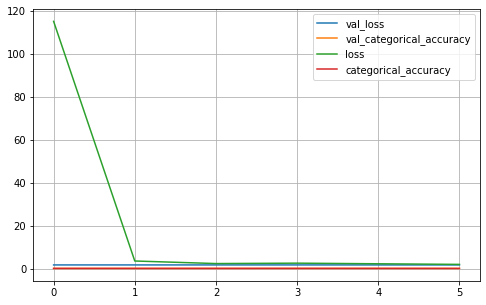

In [11]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca()
plt.show()

### Check accuracy on test dataset

In [12]:
model.evaluate_generator(test_it)

[1.7922948598861694, 0.1666666716337204]